This notebook is created for brief exploration of data set 3 for assignment 2


import packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in data as dataframe

In [4]:
data = pd.read_csv(r"C:\Users\HP1000\Downloads\Participant-03.csv")
data

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


Initial data analysis

In [5]:
data.head()

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.0
1,01/01/2022 0:00,01/01/2022 1:00,14.0
2,01/01/2022 1:00,01/01/2022 2:00,0.0
3,01/01/2022 2:00,01/01/2022 3:00,0.0
4,01/01/2022 3:00,01/01/2022 4:00,0.0


read first 5 lines of the data.

Data cleaning 

In [6]:
data.dropna()
data

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


In [7]:
num = data['Steps (count)'][data['Steps (count)']<0].count()
print("Data frame inconsistences number:" + str(num))

Data frame inconsistences number:0


Check if there is any inconsistence number.The outcome shows there is none.

Realistically, the number of steps must be an integer, and we need to round down.

In [17]:
data['Steps (count)'] = data['Steps (count)'].astype(int)
data

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0
1,01/01/2022 0:00,01/01/2022 1:00,14
2,01/01/2022 1:00,01/01/2022 2:00,0
3,01/01/2022 2:00,01/01/2022 3:00,0
4,01/01/2022 3:00,01/01/2022 4:00,0
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0
6016,08/09/2022 14:00,08/09/2022 15:00,893
6017,08/09/2022 15:00,08/09/2022 16:00,534
6018,08/09/2022 16:00,08/09/2022 17:00,390


The data frame has same decimal places, so we do not need to edit them.

In [33]:
new_data = data.drop(['Finish'],axis = 1)

new_data['Start'] = new_data['Start'].apply(pd.to_datetime) 
day = pd.DataFrame(new_data.resample('d',on = 'Start')['Steps (count)'].sum()).reset_index() #this calculation need be considered as commiting uncertainties
day

,Start,Steps (count)
0,2021-12-31,0
1,2022-01-01,1612
2,2022-01-02,43
3,2022-01-03,7459
4,2022-01-04,9358
...,...,...
338,2022-12-04,9166
339,2022-12-05,4568
340,2022-12-06,2733
341,2022-12-07,11520


In [34]:
week = pd.DataFrame(new_data.resample('w',on = 'Start')['Steps (count)'].sum()).reset_index()
week

,Start,Steps (count)
0,2022-01-02,1655
1,2022-01-09,52902
2,2022-01-16,9209
3,2022-01-23,2571
4,2022-01-30,15574
5,2022-02-06,52452
6,2022-02-13,20247
7,2022-02-20,75338
8,2022-02-27,52133
9,2022-03-06,23206


In [35]:
month = pd.DataFrame(new_data.resample('m',on = 'Start')['Steps (count)'].sum()).reset_index()
month

,Start,Steps (count)
0,2021-12-31,0
1,2022-01-31,88133
2,2022-02-28,194017
3,2022-03-31,158465
4,2022-04-30,108948
5,2022-05-31,192732
6,2022-06-30,166585
7,2022-07-31,128757
8,2022-08-31,211098
9,2022-09-30,44102


Making line plot diagram to visulize the data.

No handles with labels found to put in legend.


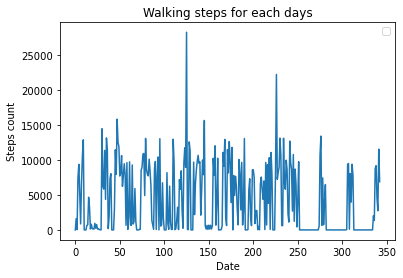

In [45]:
x = day['Start']
y = day['Steps (count)']
plt.plot(y)
plt.title('Walking steps for each days')
plt.xlabel('Date')
plt.ylabel('Steps count')
plt.legend()
plt.show()

The plot can be changed for different driven questions.

Links to GIthub:
1.Issues:https://github.sydney.edu.au/rsun5771/2022-DATA3406-CC05-Group1/issues
2.Wiki page:https://github.sydney.edu.au/rsun5771/2022-DATA3406-CC05-Group1/wiki
3.Notebooks:https://github.sydney.edu.au/rsun5771/2022-DATA3406-CC05-Group1/tree/main/Group%20data%20exploration